### Q1 Select the Tool

In [2]:
!pip install prefect

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.0/6.0 MB 10.8 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 10.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 5.6 MB/s eta 0:00:00a 0:00:01m
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 12.2 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 796.9/796.9 kB 10.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 745.1/745.1 kB 10.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.4/17.4 MB 12.0 MB/s eta 0:00:0000:0100:01
  Attempting uninstall: h11╺━━━━━━━━━━━━━━━━━━━━ 22/46 [hpack]ib]cks]
    Found existing installation: h11 0.14.0━━━━━━━━━━━━━━━━━━━ 22/46 [hpack]
    Uninstalling h11-0.14.0:╺━━━━━━━━━━━━━━━━━━━━ 22/46 [hpack]
      Successfully uninstalled h11-0.14.0m━━━━━━━━━━━━━━━━━━━━ 22/46 [hpack]
  Attempting uninstall: click━╸━━━━━━━━━━━━━━━━━ 26/46 [colorama]
    Found existing installation: click 8.2.1m━━━━━━━━━━━━━━━

### Q2 Version

In [5]:
!prefect --version

3.4.4


### Q3 Creating a pipeline

In [7]:
import pandas as pd

df = pd.read_parquet("https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_2023-03.parquet")
print(df.shape)

(3403766, 19)


### Q4 Data preparation

In [8]:
def read_dataframe(filename):
    df = pd.read_parquet(filename)

    df.tpep_dropoff_datetime = pd.to_datetime(df.tpep_dropoff_datetime)
    df.tpep_pickup_datetime = pd.to_datetime(df.tpep_pickup_datetime)

    df['duration'] = df.tpep_dropoff_datetime - df.tpep_pickup_datetime
    df.duration = df.duration.dt.total_seconds() / 60

    df = df[(df.duration >= 1) & (df.duration <= 60)]

    categorical = ['PULocationID', 'DOLocationID']
    df[categorical] = df[categorical].astype(str)
    
    return df

df = read_dataframe("https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_2023-03.parquet")
print(df.shape)

(3316216, 20)


### Q5 Train a model

In [19]:
!python duration-prediction.py --color yellow --year 2023 --month 3 --modeltype LR

Run params: Namespace(color='yellow', year=2023, month=3, modeltype='LR')
reading from cloud: yellow_tripdata_2023-03.parquet
reading from cloud: yellow_tripdata_2023-04.parquet
Fitting and Transforming with DictVectorizer
Transforming with DictVectorizer
Training model of type LR
2025/06/01 03:36:19 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
Intercept of the model: 24.776477502183205
🏃 View run nosy-gnat-111 at: http://localhost:5000/#/experiments/1/runs/57f52cb5834340dab02f96266fdff34a
🧪 View experiment at: http://localhost:5000/#/experiments/1
MLflow run_id: 57f52cb5834340dab02f96266fdff34a


### Q6 Register the model

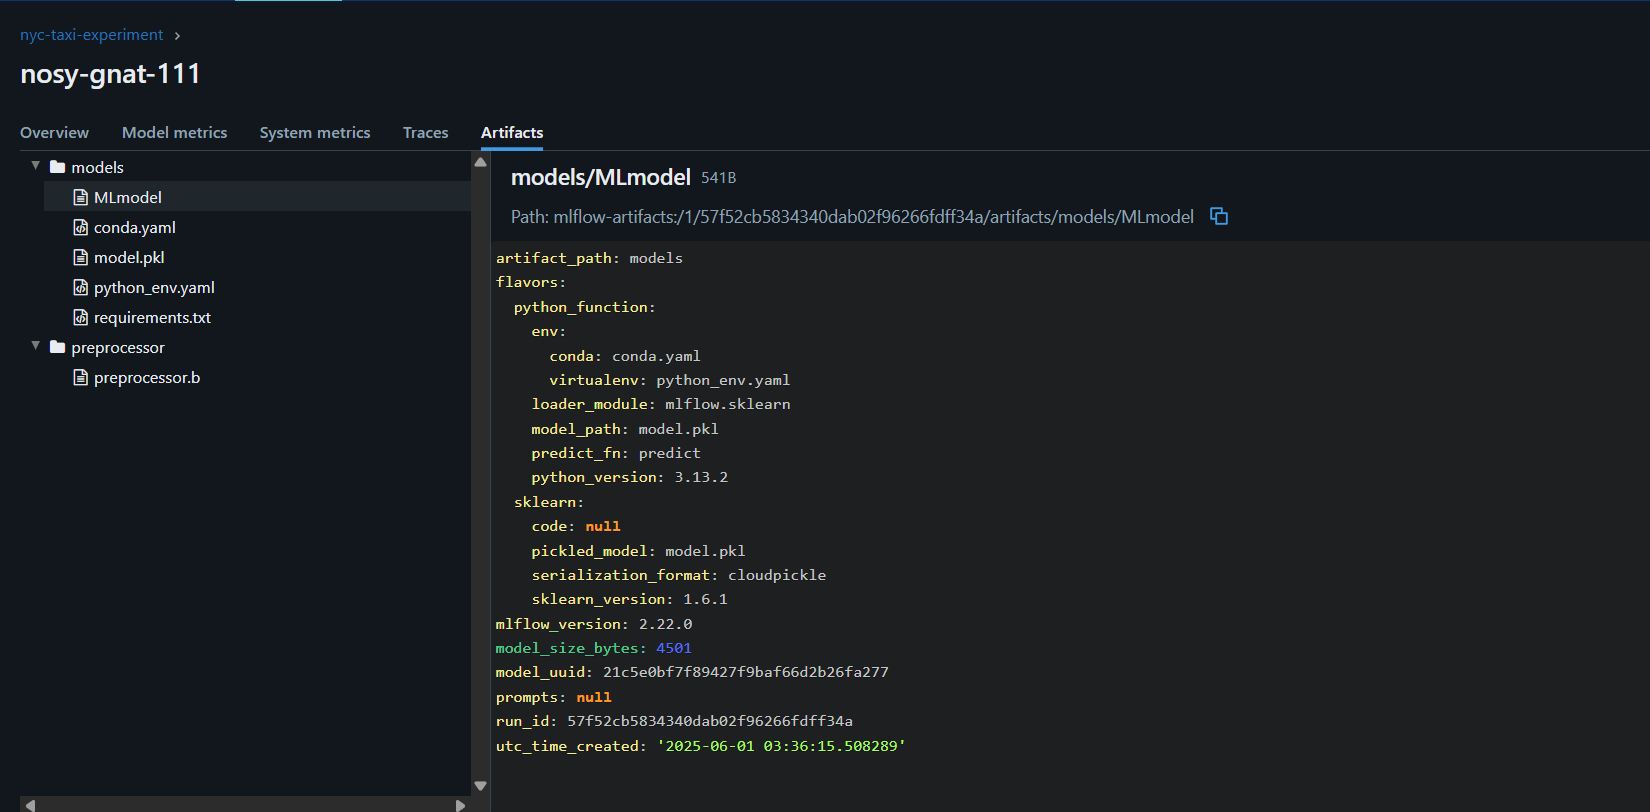

In [23]:
from IPython.display import Image
Image('model_size.png')

Model size is 4.501 (closest choice is 4.534)